# Identify swimming

# Judge a book by its cover :)
## Look at gender, age, height, weight, country, year and event(?) attended to predict the medal

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Load Data and merge 2 files

In [2]:
athlete = pd.read_csv('athlete_events.csv')
region = pd.read_csv('noc_regions.csv')
merged = pd.merge(athlete,region, on = 'NOC', how='left')

In [3]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [4]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
region    270746 non-null object
notes     5039 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


# Extracting swimming data

In [5]:
swimming = pd.DataFrame(merged[merged['Sport']=='Swimming'])
print("Swimming Data Dimension:",swimming.shape)
print("Type:",type(swimming))
swimming.head()

Swimming Data Dimension: (23195, 17)
Type: <class 'pandas.core.frame.DataFrame'>


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN
35,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN,Finland,NaN
36,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN,Finland,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN


In [6]:
print(swimming.dtypes)

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
notes      object
dtype: object


# Exploratory Analysis 

In [7]:
# Information about variables
swimming.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23195 entries, 29 to 271088
Data columns (total 17 columns):
ID        23195 non-null int64
Name      23195 non-null object
Sex       23195 non-null object
Age       22671 non-null float64
Height    19150 non-null float64
Weight    18804 non-null float64
Team      23195 non-null object
NOC       23195 non-null object
Games     23195 non-null object
Year      23195 non-null int64
Season    23195 non-null object
City      23195 non-null object
Sport     23195 non-null object
Event     23195 non-null object
Medal     3048 non-null object
region    23048 non-null object
notes     515 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 3.2+ MB


In [8]:
swimming['Season'].unique()

array(['Summer'], dtype=object)

Swimming sport only takes place in Summer Olympic Games

### Atheletes participation for Swimming over Years

Text(0.5, 1.0, 'Olympics swimming over years')

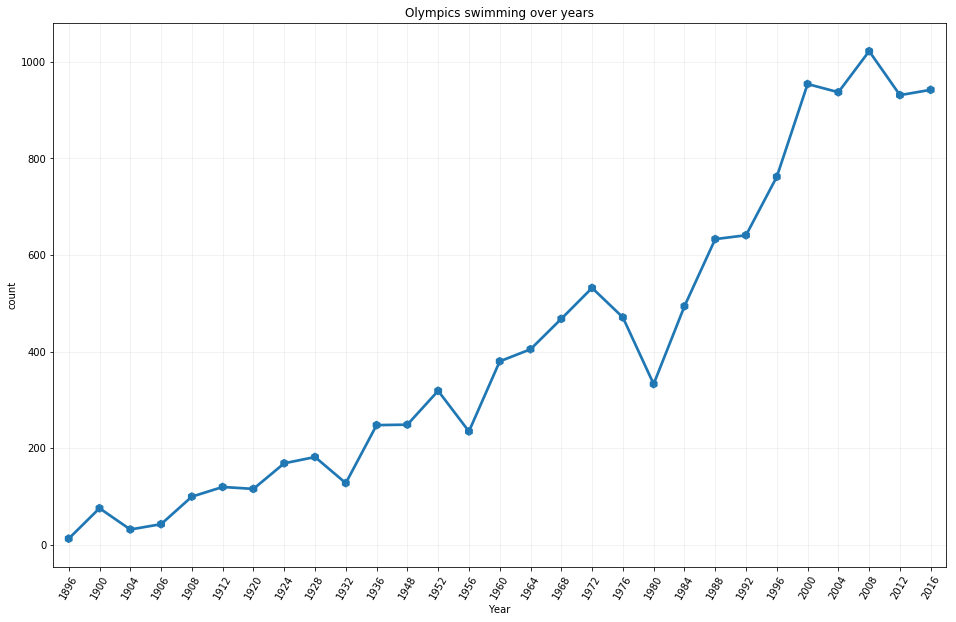

In [9]:
swim_c = swimming.groupby('Year')['ID'].nunique().reset_index()

fig = plt.figure(figsize=(16,10))
sb.pointplot(x = swim_c['Year'],y=swim_c['ID'],markers="h")
plt.xticks(rotation = 60)
plt.grid(True,alpha=.2)
plt.ylabel('count')
plt.title('Olympics swimming over years')

### Swimming participation by gender

Women participated in Olympics swimming for the first time at 1912 Summer Olympics. It was the first appearance of a women's event in Olympic Swimming.

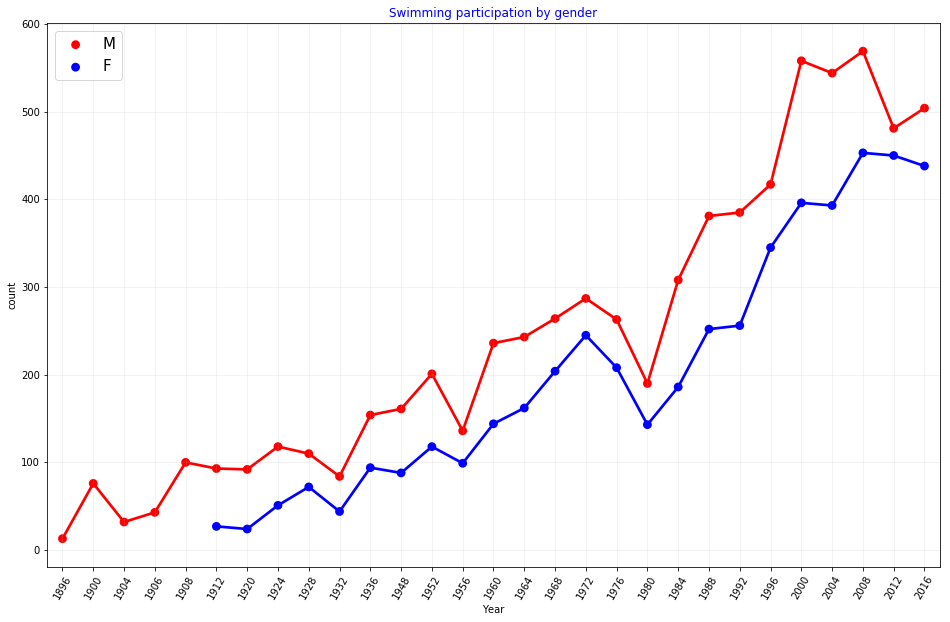

In [10]:
swim_gc = swimming.groupby(["Year","Sex"])["ID"].nunique().reset_index()

fig= plt.figure(figsize=(16,10))
sb.pointplot(x=swim_gc['Year'],y=swim_gc['ID'],hue = swim_gc['Sex'],palette = ["r","b"])
plt.grid(True,alpha = .2)
plt.xticks(rotation =60)
plt.ylabel("count")
plt.title("Swimming participation by gender",color='b')
plt.legend(loc = 'best', prop ={'size':15})

### Countries participation at the Olympic Games
Nations, as represented by National Olympic Committees (NOCS), that have participated in the Summer Olympic Games between 1896 and 2016

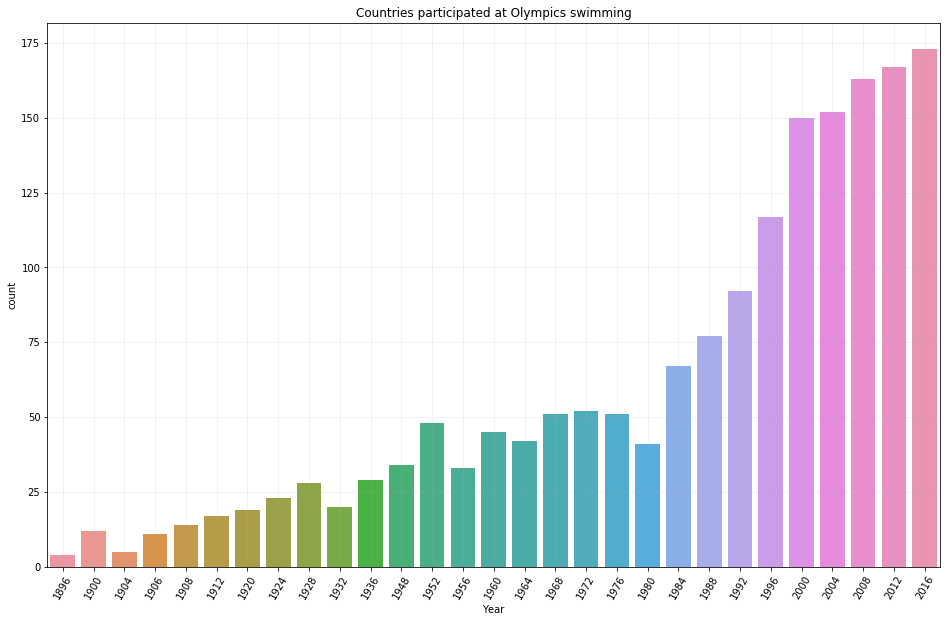

In [11]:
plt.figure(figsize=(16,10))
country_c = swimming.groupby('Year')['NOC'].nunique().reset_index()

sb.barplot(x='Year',y='NOC',data=country_c)
plt.xticks(rotation = 60)
plt.ylabel('count')
plt.title('Countries participated at Olympics swimming')
plt.grid(True,alpha =.2)

##### One of the reasons for fluctuation:
There were some boycotts that makes the number of participated countries fluctuated
For example, in 1956, Iraq, Lebanon and Egypt boycotted the games in protest at the British, French and Israeli invasion of Egypt. And in 1980, 50 western nations protest against Russia's invasion of Afghanistan by boycotting the Moscow games

### Nations with highest number of participation in Olympics swimming

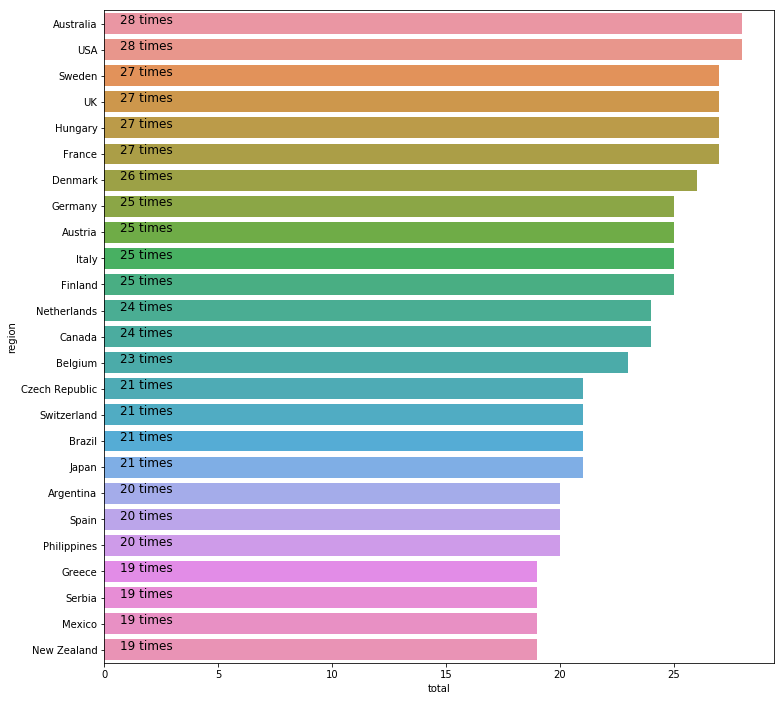

In [12]:
yr_cn = pd.crosstab(swimming['region'],swimming['Year']).reset_index()
for i in yr_cn.columns[1:]:
    yr_cn[i]= yr_cn[i].apply(lambda x: 1 if x>0 else 0)
yr_cn['total'] = yr_cn[yr_cn.columns[1:]].sum(axis=1)
yr_cn = yr_cn.sort_values(by='total',ascending=False)

plt.figure(figsize=(12,12))
yr_cn_plot = sb.barplot('total','region',data=yr_cn[:25])

for i,j in enumerate(yr_cn['total'][:25].astype(str)+" times"):
    yr_cn_plot.text(.7,i,j,fontsize=12)

### Number of participation using map

In [13]:
cn_map = yr_cn[['region','total']]
trace = go.Choropleth(locations = cn_map['region'],
                     locationmode='country names',
                     z = cn_map['total'],
                     colorscale = "Picnic",
                     autocolorscale = False,
                     reversescale= True,
                     marker = dict(line=dict(width=1,color="black")),
                     colorbar = dict(title="Count of Participation",titleside="right"))
data = [trace]
layout = go.Layout(dict(title='Countries participation in Olympics swimming',
                       geo = dict(showframe=True,
                                 showocean = True,
                                 oceancolor = '#10223A',
                                 bgcolor = "rgb(255,204,51)",
                                 showcoastlines = True,
                                 projection = dict(type='equirectangular'))))
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

### Height, Weight and Age Distribution

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


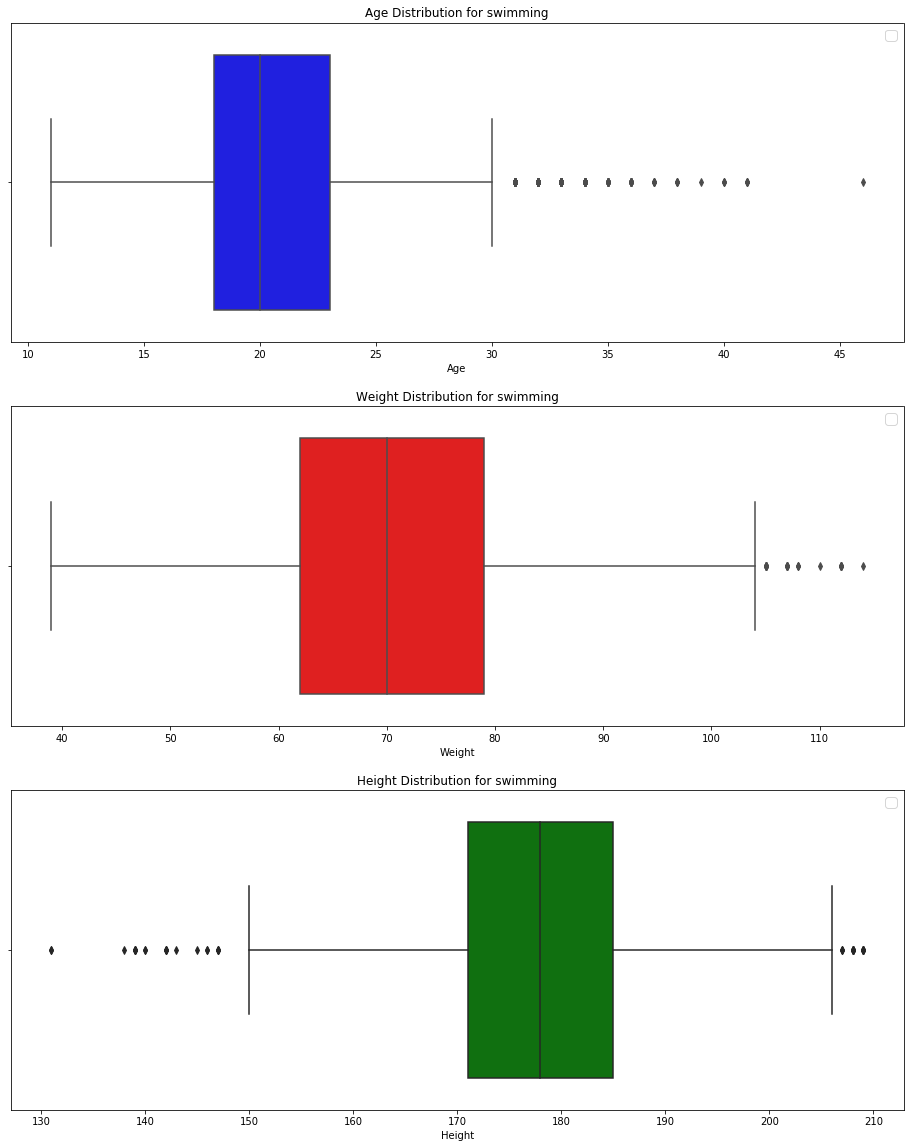

In [14]:
cols = ['Age','Weight','Height']
clr =['b','r','g']
fig = plt.figure(figsize=(16,20))
count =0
for i in cols:
    plt.subplot(311+count)
    sb.boxplot(x=swimming[swimming[i].notnull()][i],color=clr[count])
    plt.legend(loc='best',prop={'size':14})
    plt.title(i+ " Distribution for swimming")
    count +=1

### Body mass index

## Missing data 

In [15]:
swimming.isnull().sum()

ID            0
Name          0
Sex           0
Age         524
Height     4045
Weight     4391
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     20147
region      147
notes     22680
dtype: int64

In [16]:
check = swimming.groupby('Year')[['Age','Weight','Height']].count()
check.tail()

,Age,Weight,Height
Year,,,
2000,1741,1716,1718
2004,1618,1611,1612
2008,1749,1722,1726
2012,1538,1518,1522
2016,1568,1535,1535


In [17]:
check['Total attendants'] = swimming['Year'].value_counts()


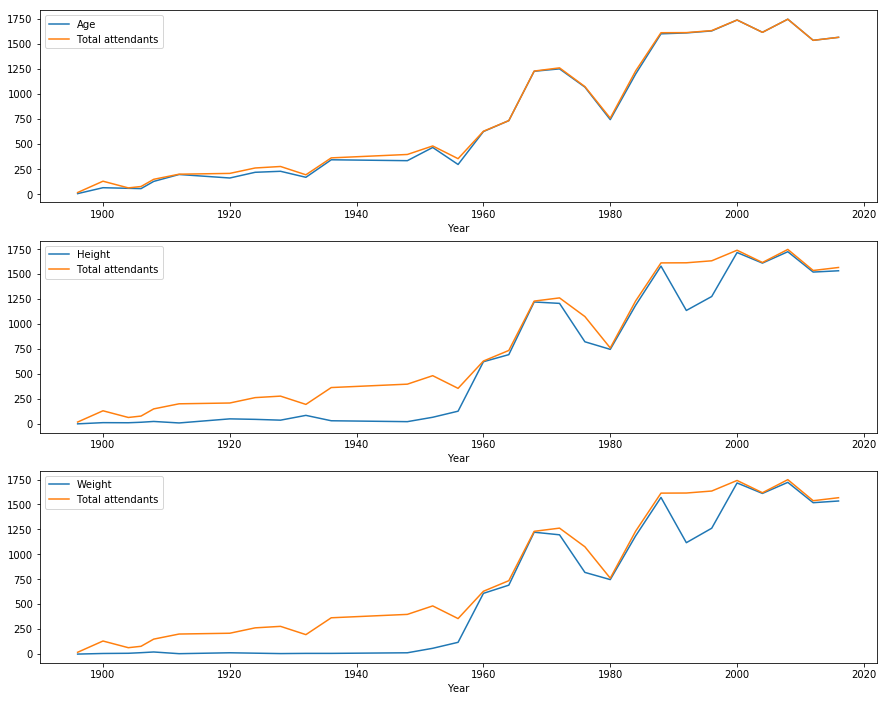

In [18]:
a4_dims = (15, 12)
fig, axes = plt.subplots(3,1,figsize=a4_dims)
check.plot.line(ax = axes[0],y=['Age','Total attendants'])
check.plot.line(ax = axes[1],y=['Height','Total attendants'])
check.plot.line(ax = axes[2],y=['Weight','Total attendants'])

In [19]:
check['non-null Age'] = check['Age']/check['Total attendants']
check['non-null Height'] = check['Height']/check['Total attendants']
check['non-null Weight'] = check['Weight']/check['Total attendants']
check.head()

,Age,Weight,Height,Total attendants,non-null Age,non-null Height,non-null Weight
Year,,,,,,,
1896,7,0,0,18,0.388889,0.000000,0.000000
1900,66,6,12,131,0.503817,0.091603,0.045802
1904,60,8,11,64,0.937500,0.171875,0.125000
1906,57,14,16,78,0.730769,0.205128,0.179487
1908,129,21,24,150,0.860000,0.160000,0.140000


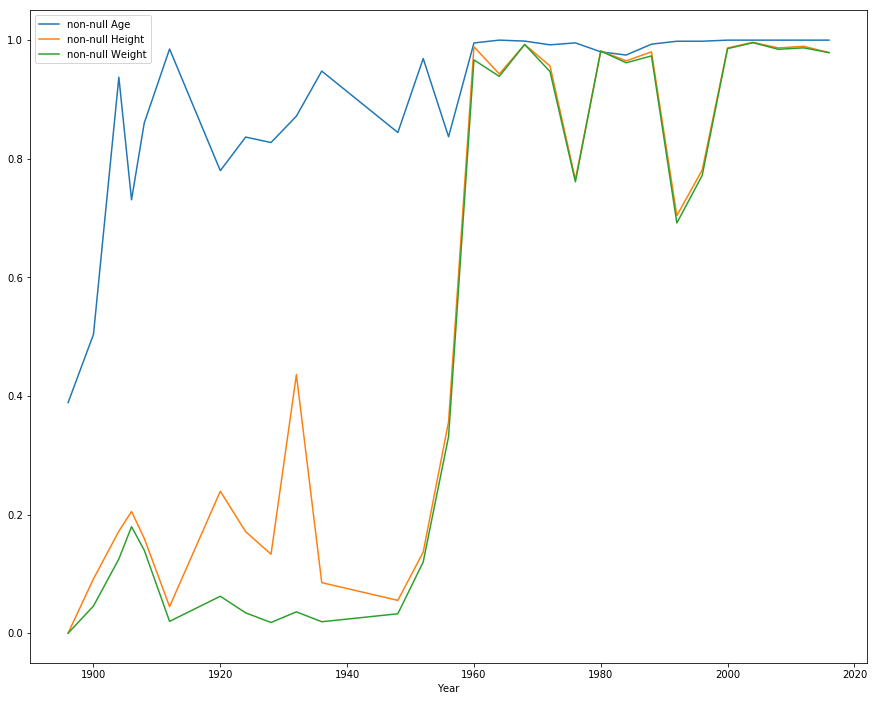

In [20]:
a4_dims = (15, 12)
fig, axes = plt.subplots(figsize=a4_dims)
check.plot.line(ax=axes,y=['non-null Age','non-null Height','non-null Weight'])

Until 1960, there were lots of missing Height and Weight data.

# End of Data Exploratory
# Handling missing data

Only take data from 1960 til now

In [21]:
swimmingFrom60 = pd.DataFrame(swimming[swimming['Year']>=1960])
swimmingFrom60.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20007 entries, 100 to 271088
Data columns (total 17 columns):
ID        20007 non-null int64
Name      20007 non-null object
Sex       20007 non-null object
Age       19924 non-null float64
Height    18615 non-null float64
Weight    18521 non-null float64
Team      20007 non-null object
NOC       20007 non-null object
Games     20007 non-null object
Year      20007 non-null int64
Season    20007 non-null object
City      20007 non-null object
Sport     20007 non-null object
Event     20007 non-null object
Medal     2430 non-null object
region    19862 non-null object
notes     439 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 2.7+ MB


# Replace NaN value in Medal column

In [22]:
swimmingFrom60['Medal'].fillna(value='No Medal',inplace = True)

Look for data with 3 Nan value in Age, Weight, Height

In [23]:
a = swimmingFrom60.loc[(swimmingFrom60['Age'].isnull()) & 
                       (swimmingFrom60['Height'].isnull())& 
                       (swimmingFrom60['Weight'].isnull())]
print('Type of medal:',a['Medal'].unique())
a.info()

Type of medal: ['No Medal']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 3403 to 264588
Data columns (total 17 columns):
ID        62 non-null int64
Name      62 non-null object
Sex       62 non-null object
Age       0 non-null float64
Height    0 non-null float64
Weight    0 non-null float64
Team      62 non-null object
NOC       62 non-null object
Games     62 non-null object
Year      62 non-null int64
Season    62 non-null object
City      62 non-null object
Sport     62 non-null object
Event     62 non-null object
Medal     62 non-null object
region    62 non-null object
notes     0 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 8.7+ KB


Only 62 data have missing values all Age, Weight, Height; Contain only 'No medal'. Therefore we can get rid of this data without creating much bias

In [24]:
s60 = swimmingFrom60.loc[(swimmingFrom60['Age'].notnull()) | 
                       (swimmingFrom60['Height'].notnull()) | 
                       (swimmingFrom60['Weight'].notnull())]
s60.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19945 entries, 100 to 271088
Data columns (total 17 columns):
ID        19945 non-null int64
Name      19945 non-null object
Sex       19945 non-null object
Age       19924 non-null float64
Height    18615 non-null float64
Weight    18521 non-null float64
Team      19945 non-null object
NOC       19945 non-null object
Games     19945 non-null object
Year      19945 non-null int64
Season    19945 non-null object
City      19945 non-null object
Sport     19945 non-null object
Event     19945 non-null object
Medal     19945 non-null object
region    19800 non-null object
notes     439 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 2.7+ MB


### Fill in NaN value in region by copying the Team name

In [25]:
s60['region'].fillna(value=0,inplace= True)

In [26]:
s60['region'] = s60.apply(lambda row: row['Team'] 
                          if row['region']==0
                         else row['region'],axis =1)

Take care of Age,Weight and Height

Get average value of every female or male athletes in a specific year (in case needed)

In [27]:
average = s60.groupby(['Year','Sex'])[['Age','Weight','Height']].mean().unstack()
average.head()

Age                Weight                 Height            
Sex           F          M          F          M           F           M
Year                                                                    
1960  18.104418  20.195767  61.060729  74.331492  166.818548  178.920000
1964  17.945455  20.078091  60.270588  74.706422  167.341176  179.298405
1968  17.157598  19.706897  59.233459  73.800866  167.497164  179.855700
1972  17.120000  19.662242  58.627542  73.816031  167.567766  181.306647
1976  16.810757  19.383128  58.806841  73.386646  168.647887  182.030675

Use data from athletes of "that" region in "that" Year for imputation
Use multi-indexing to put mean value in a dataframe

In [28]:
country = s60.groupby(['Year','region','Sex'])[['Age','Height','Weight']].mean().unstack()
country.head()

Age                 Height             Weight           
Sex                     F          M           F           M      F          M
Year region                                                                   
1960 Argentina        NaN  16.500000         NaN  175.000000    NaN  68.250000
     Australia  18.190476  19.560000  167.285714  182.217391   62.8  78.619048
     Austria    19.166667  21.666667  165.166667  180.000000   61.0  68.666667
     Belgium    16.000000  19.000000  161.000000  180.000000   63.0  72.500000
     Brazil           NaN  17.444444         NaN  182.888889    NaN        NaN

Function: if data is missing, we impute with the value in the "country" table. If the value in "country" table is missing also, use the value in "average" table


In [29]:
def func(val,val_class,year,region,sex):
    if not (np.isnan(val)):
        return val
    else:
        if not (np.isnan(country.loc[(year,region),(val_class,sex)])):
            return country.loc[(year,region),(val_class,sex)]
        else:
            return average.loc[year,(val_class,sex)]

In [30]:
missing_list = ['Age','Height','Weight']
for i in missing_list:
    s60[i]=s60.apply(lambda row: 
                 func(row[i],i,row['Year'],row['region'],row['Sex'])
                 ,axis = 1)

In [31]:
s60.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19945 entries, 100 to 271088
Data columns (total 17 columns):
ID        19945 non-null int64
Name      19945 non-null object
Sex       19945 non-null object
Age       19945 non-null float64
Height    19945 non-null float64
Weight    19945 non-null float64
Team      19945 non-null object
NOC       19945 non-null object
Games     19945 non-null object
Year      19945 non-null int64
Season    19945 non-null object
City      19945 non-null object
Sport     19945 non-null object
Event     19945 non-null object
Medal     19945 non-null object
region    19945 non-null object
notes     439 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 2.7+ MB


Round up number

In [32]:
s60 = round(s60)

# We have finished cleaning the data. It's time to try to analyse the data again

In [33]:
s60.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
100,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 100 metres Butterfly,No Medal,Netherlands,NaN
101,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 200 metres Butterfly,No Medal,Netherlands,NaN
102,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 4 x 100 metres Medley Relay,No Medal,Netherlands,NaN
103,36,Stefan Remco Aartsen,M,25.0,194.0,78.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 100 metres Butterfly,No Medal,Netherlands,NaN
104,36,Stefan Remco Aartsen,M,25.0,194.0,78.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 200 metres Butterfly,No Medal,Netherlands,NaN


In [34]:
countryArray = s60['region'].unique()
def regionReplace(country):
    arr = np.where(countryArray == country)
    return arr[0][0]
s60['region'] = s60.apply(lambda row: regionReplace(row['region']),axis=1)


In [35]:
s60.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
100,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 100 metres Butterfly,No Medal,0,NaN
101,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 200 metres Butterfly,No Medal,0,NaN
102,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 4 x 100 metres Medley Relay,No Medal,0,NaN
103,36,Stefan Remco Aartsen,M,25.0,194.0,78.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 100 metres Butterfly,No Medal,0,NaN
104,36,Stefan Remco Aartsen,M,25.0,194.0,78.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 200 metres Butterfly,No Medal,0,NaN


# Need improving in plotting data

In [36]:
# f, axes = plt.subplots(6, 3, figsize=(18, 24))
# colors = ["r", "g", "b", "m", "c", "y"]
# numeric = ['Age','Weight','Height']
# count = 0
# for var in numeric:
#     sb.boxplot(male[var], orient = "h", color = colors[count], ax = axes[count,0])
#     sb.distplot(male[var], color = colors[count], ax = axes[count,1])
#     sb.violinplot(male[var], color = colors[count], ax = axes[count,2])
#     count += 1
#     sb.boxplot(female[var], orient = "h", color = colors[count], ax = axes[count,0])
#     sb.distplot(female[var], color = colors[count], ax = axes[count,1])
#     sb.violinplot(female[var], color = colors[count], ax = axes[count,2])
#     count += 1

Introduce new feature and extract male/female medalist

In [37]:
s60['BMI'] = s60['Weight']/((s60['Height']/100)**2)
s60['Medal'].value_counts()

No Medal    17515
Gold          885
Silver        785
Bronze        760
Name: Medal, dtype: int64

### Imbalanced data
#### Undersampling the non-medalists

In [38]:
imb_male = pd.DataFrame(s60[(s60['Sex']=='M')])
imb_female = pd.DataFrame(s60[(s60['Sex']=='F')])
print(imb_male['Medal'].value_counts())
print('#########')
print(imb_female['Medal'].value_counts())

No Medal    9808
Gold         465
Silver       406
Bronze       400
Name: Medal, dtype: int64
#########
No Medal    7707
Gold         420
Silver       379
Bronze       360
Name: Medal, dtype: int64


In [39]:
imb_male_count1,imb_male_count2,imb_male_count3= imb_male['Medal'].value_counts()[1:4]
imb_female_count1,imb_female_count2,imb_female_count3 = imb_female['Medal'].value_counts()[1:4]

#Divide by class
male_non_medal_imb = imb_male[imb_male['Medal']=='No Medal']
male_medal = imb_male[imb_male['Medal']!='No Medal']
female_non_medal_imb = imb_female[imb_female['Medal']=='No Medal']
female_medal = imb_female[imb_female['Medal']!='No Medal']


In [40]:
#Random under-sampling
male_non_medal = male_non_medal_imb.sample(max((imb_male_count1,imb_male_count2,imb_male_count3)))
female_non_medal = female_non_medal_imb.sample(max((imb_female_count1,imb_female_count2,imb_female_count3)))

#Balanced dataset
male = pd.concat([male_medal,male_non_medal],axis = 0)
female = pd.concat([female_medal,female_non_medal],axis = 0)


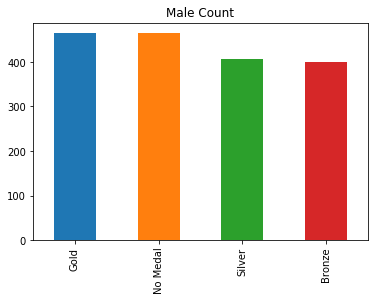

In [41]:
male['Medal'].value_counts().plot(kind = 'bar', title = 'Male Count')

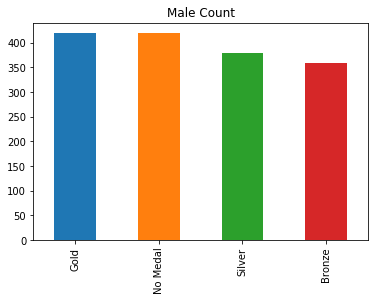

In [42]:
female['Medal'].value_counts().plot(kind = 'bar', title = 'Male Count')

# Decision Tree

Univariate Decision Tree

In [43]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

#Extract BMI data
bmi_male= pd.DataFrame(male['BMI'])
bmi_female = pd.DataFrame(female['BMI'])
medal_male = pd.DataFrame(male['Medal'].astype('category'))
medal_female = pd.DataFrame(female['Medal'].astype('category'))

Text(0.5, 1.0, 'Female')

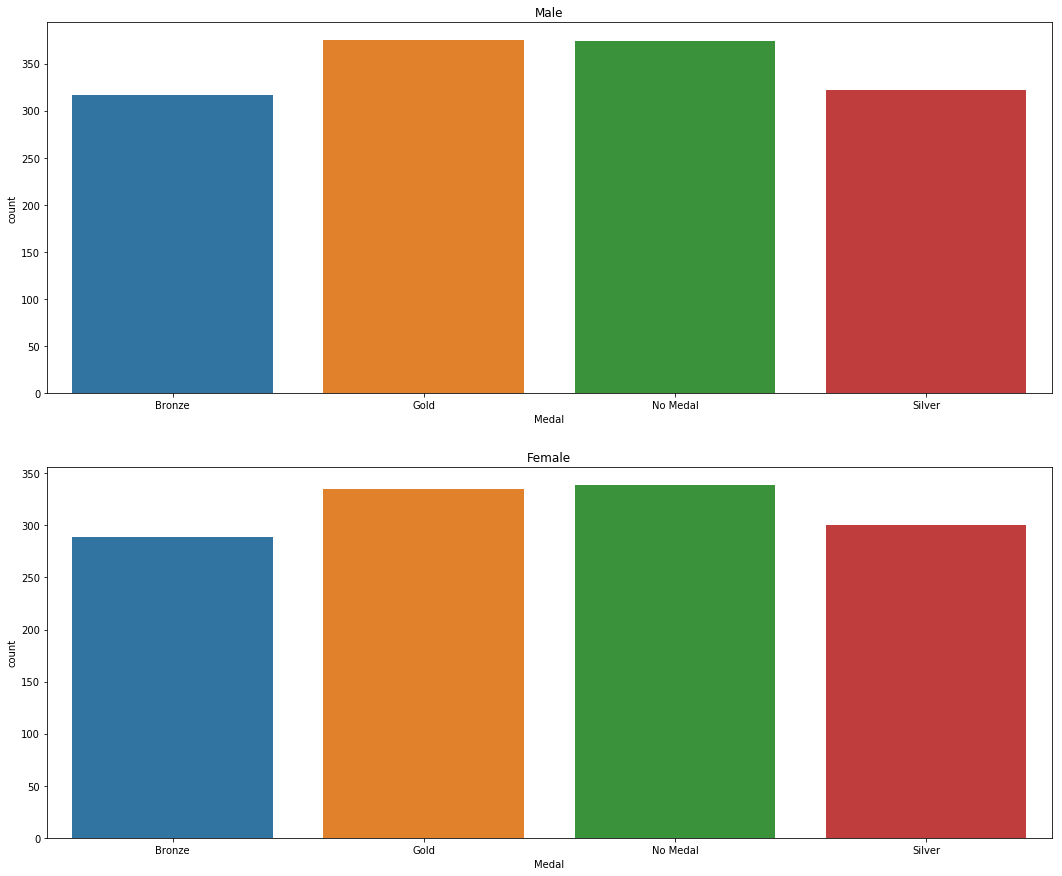

In [44]:
# Split the Dataset into Train and Test
male_train, male_test, y_male_train, y_male_test = train_test_split(bmi_male, medal_male, test_size = 0.2)
female_train, female_test, y_female_train, y_female_test = train_test_split(bmi_female, medal_female, test_size = 0.2)

# Draw the distribution of Response
f, axes = plt.subplots(2, 1, figsize=(18, 15))
sb.countplot(y_male_train["Medal"],ax = axes[0]).set_title('Male')
sb.countplot(y_female_train["Medal"],ax = axes[1]).set_title('Female')

Text(0.5, 1.0, 'Female')

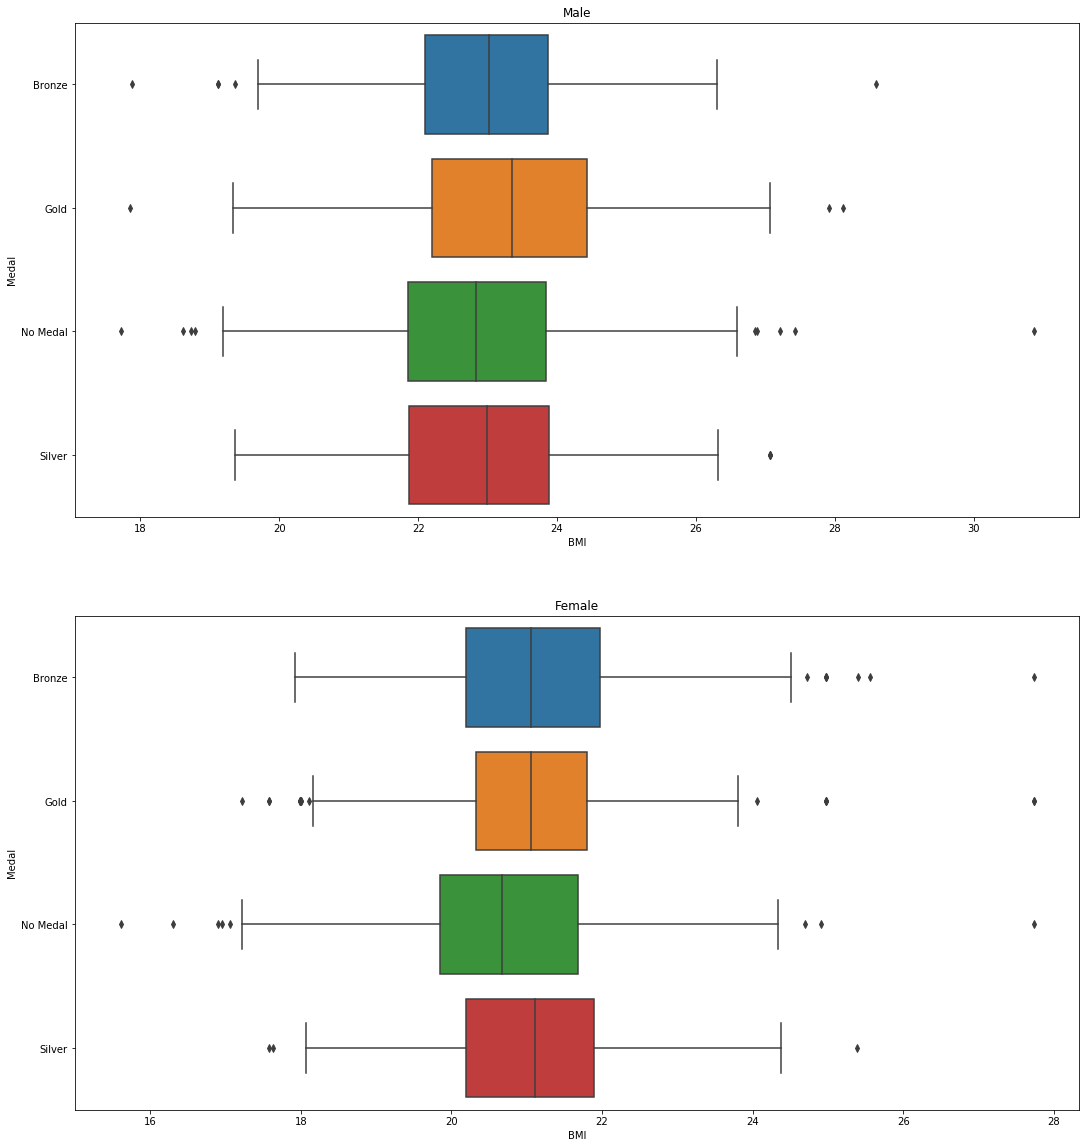

In [45]:
# Relationship between Response and the Predictors
trainDF_male = pd.concat([y_male_train,male_train], axis = 1, join_axes = [y_male_train.index])
trainDF_female = pd.concat([y_female_train,female_train], axis = 1, join_axes = [y_female_train.index])
f, axes = plt.subplots(2, 1, figsize=(18, 20))

sb.boxplot(x = 'BMI', y = "Medal", data = trainDF_male, orient = "h", ax = axes[0]).set_title("Male")
sb.boxplot(x = 'BMI', y = "Medal", data = trainDF_female, orient = "h", ax = axes[1]).set_title("Female")



training dataset

In [46]:
# Decision Tree using Train Data
##Male
dectree_male = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree_male.fit(male_train, y_male_train)                    # train the decision tree model
##Female
dectree_female = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree_female.fit(female_train, y_female_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
##Male
male_train_pred = dectree_male.predict(male_train)
male_test_pred = dectree_male.predict(male_test)
##Female
female_train_pred = dectree_female.predict(female_train)
female_test_pred = dectree_female.predict(female_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.3314121037463977

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.28448275862068967



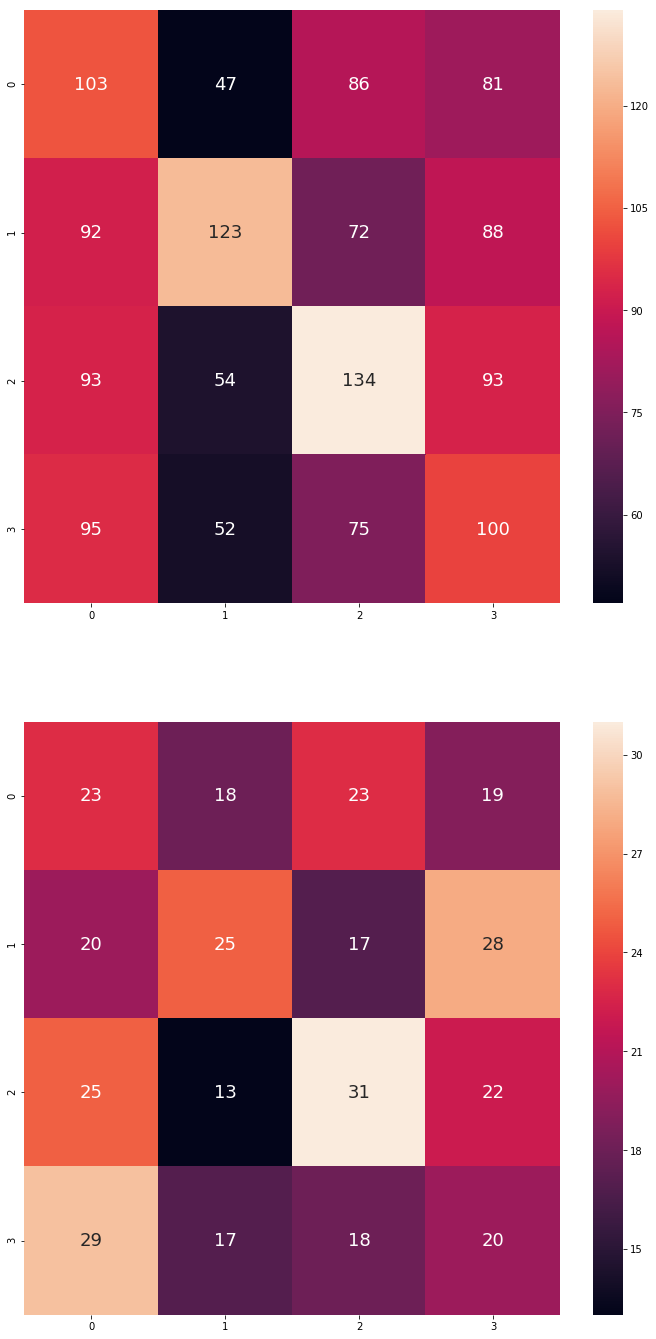

In [47]:
########Check for Male
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree_male.score(male_train, y_male_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree_male.score(male_test, y_male_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_male_train, male_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_male_test, male_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.33729216152019004

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.2468354430379747



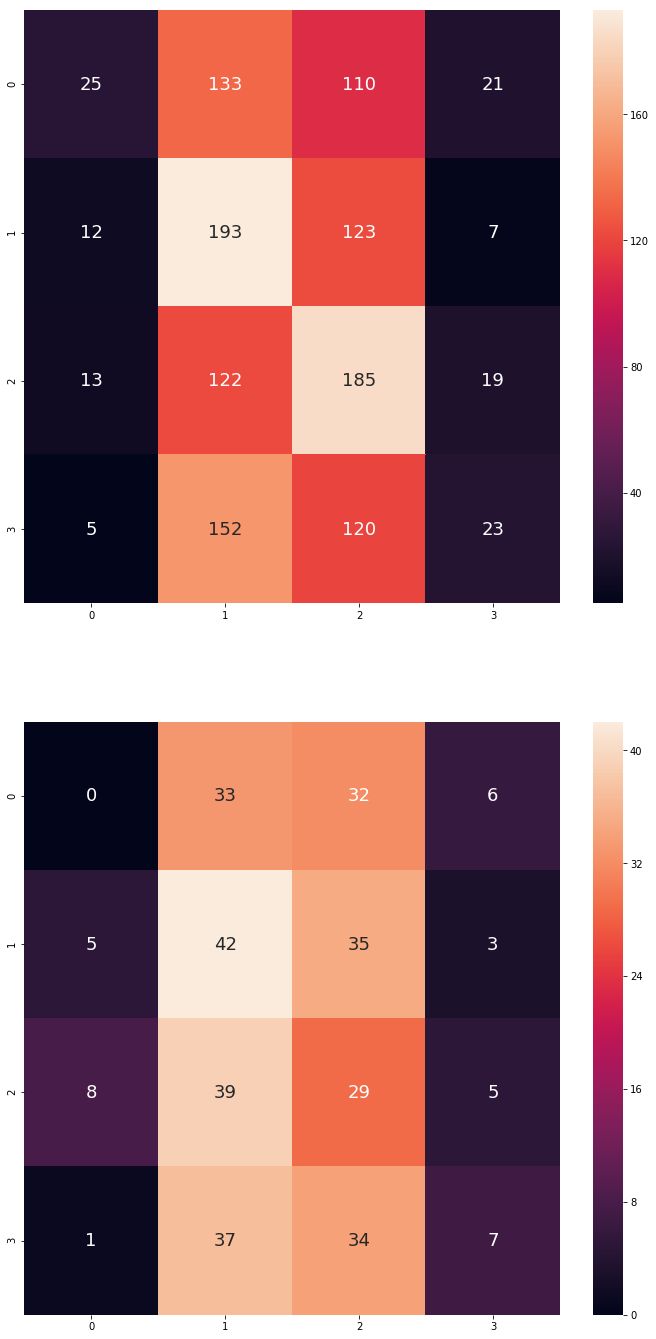

In [48]:
########Check for Female
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree_female.score(female_train, y_female_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree_female.score(female_test, y_female_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_female_train, female_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_female_test, female_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

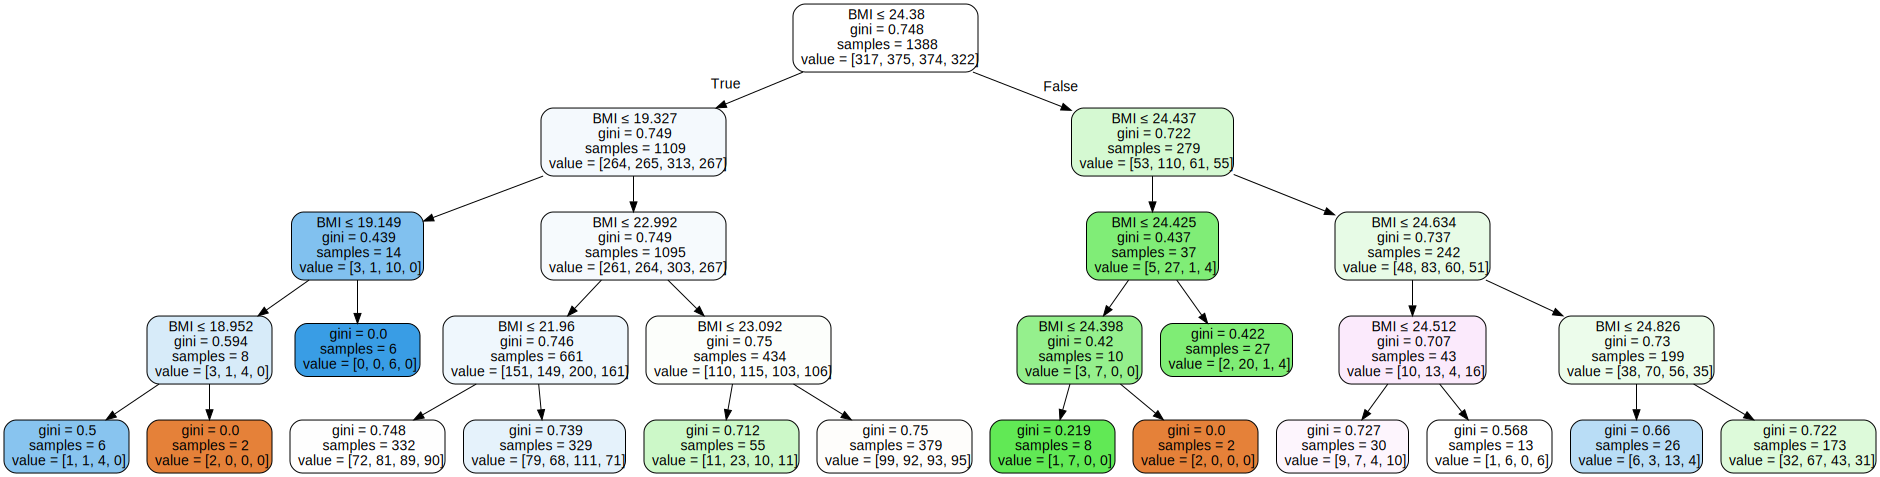

In [49]:
# Plot the Decision Tree
#### MALE ######
treedot = export_graphviz(dectree_male,                                      # the model
                          feature_names = male_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

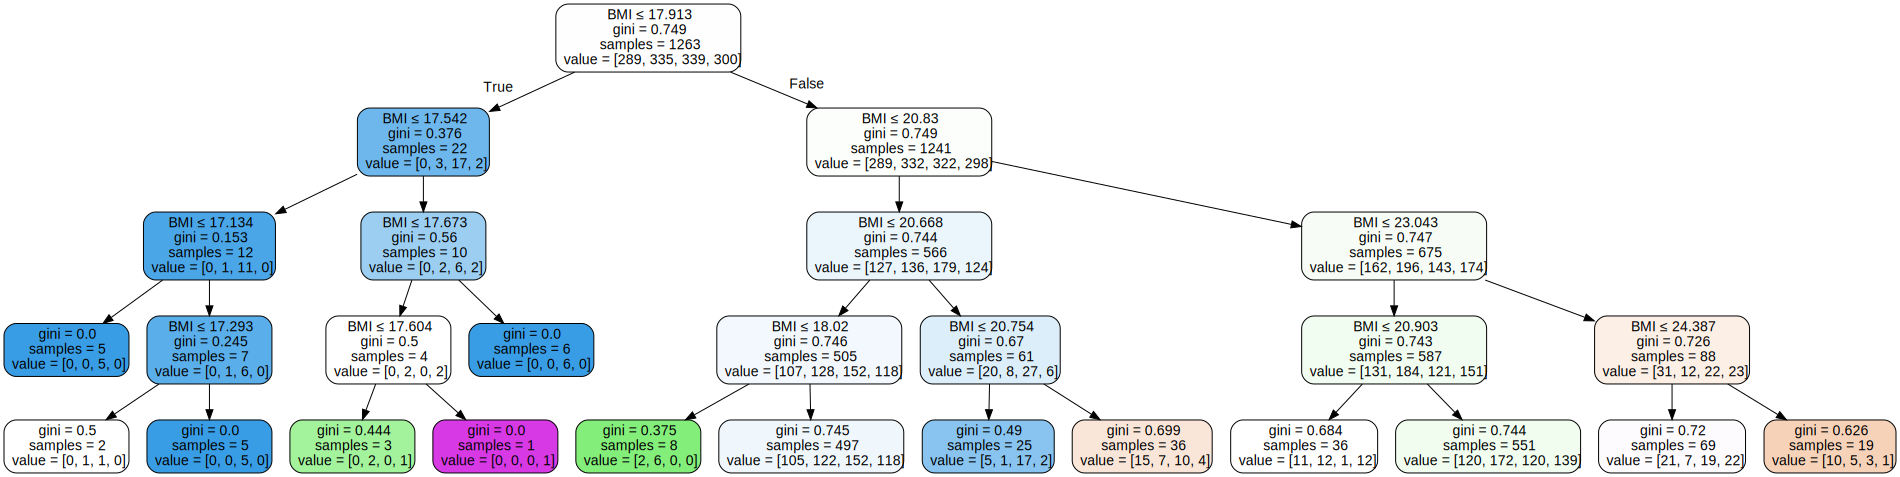

In [50]:
# Plot the Decision Tree
#### FEMALE ######
treedot = export_graphviz(dectree_female,                                      # the model
                          feature_names = female_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

### Test 3 cases (Later)

# Multivariate Classification

In [51]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

predictors = ['Year','Age','Height','Weight','region']
#Extract BMI data
X_male= pd.DataFrame(male[predictors])
X_female = pd.DataFrame(female[predictors])
medal_male = pd.DataFrame(male['Medal'].astype('category'))
medal_female = pd.DataFrame(female['Medal'].astype('category'))

Text(0.5, 1.0, 'Female')

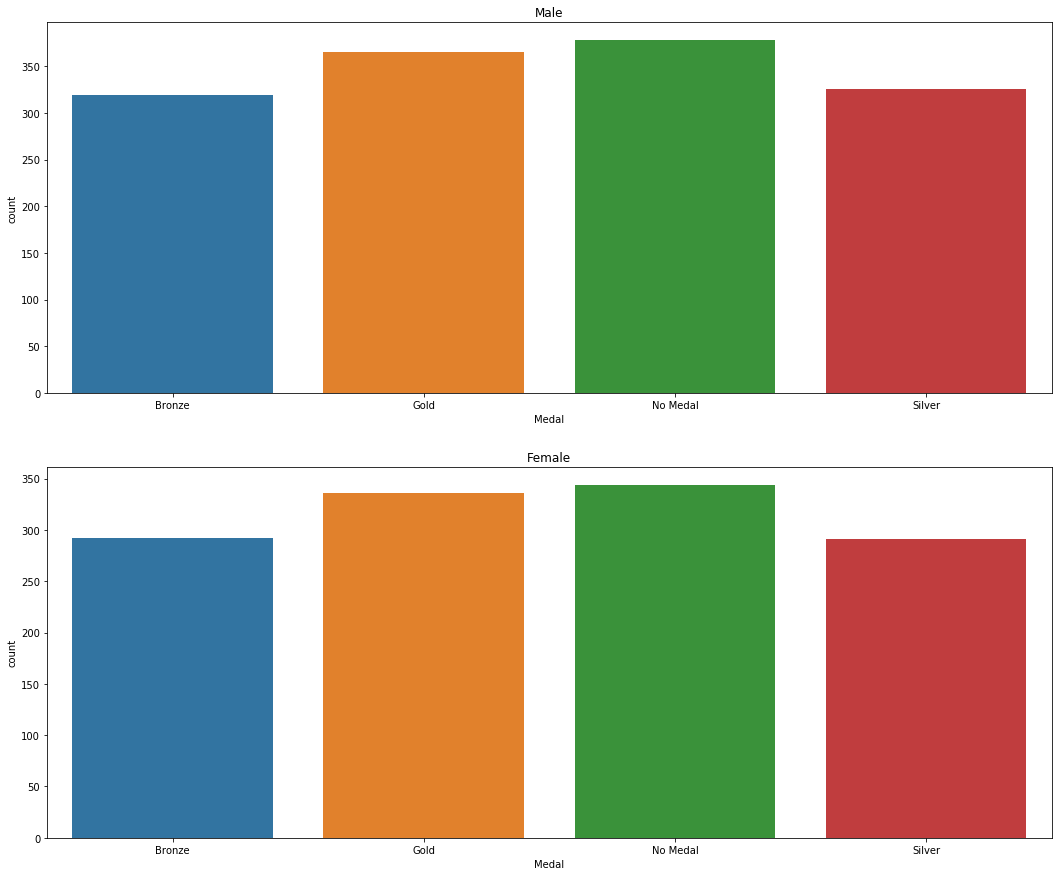

In [52]:
# Split the Dataset into Train and Test
male_train, male_test, y_male_train, y_male_test = train_test_split(X_male, medal_male, test_size = 0.2)
female_train, female_test, y_female_train, y_female_test = train_test_split(X_female, medal_female, test_size = 0.2)

# Draw the distribution of Response
f, axes = plt.subplots(2, 1, figsize=(18, 15))
sb.countplot(y_male_train["Medal"],ax = axes[0]).set_title('Male')
sb.countplot(y_female_train["Medal"],ax = axes[1]).set_title('Female')

In [53]:
# Decision Tree using Train Data
##Male
dectree_male = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree_male.fit(male_train, y_male_train)                    # train the decision tree model
##Female
dectree_female = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree_female.fit(female_train, y_female_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
##Male
male_train_pred = dectree_male.predict(male_train)
male_test_pred = dectree_male.predict(male_test)
##Female
female_train_pred = dectree_female.predict(female_train)
female_test_pred = dectree_female.predict(female_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5432276657060519

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5



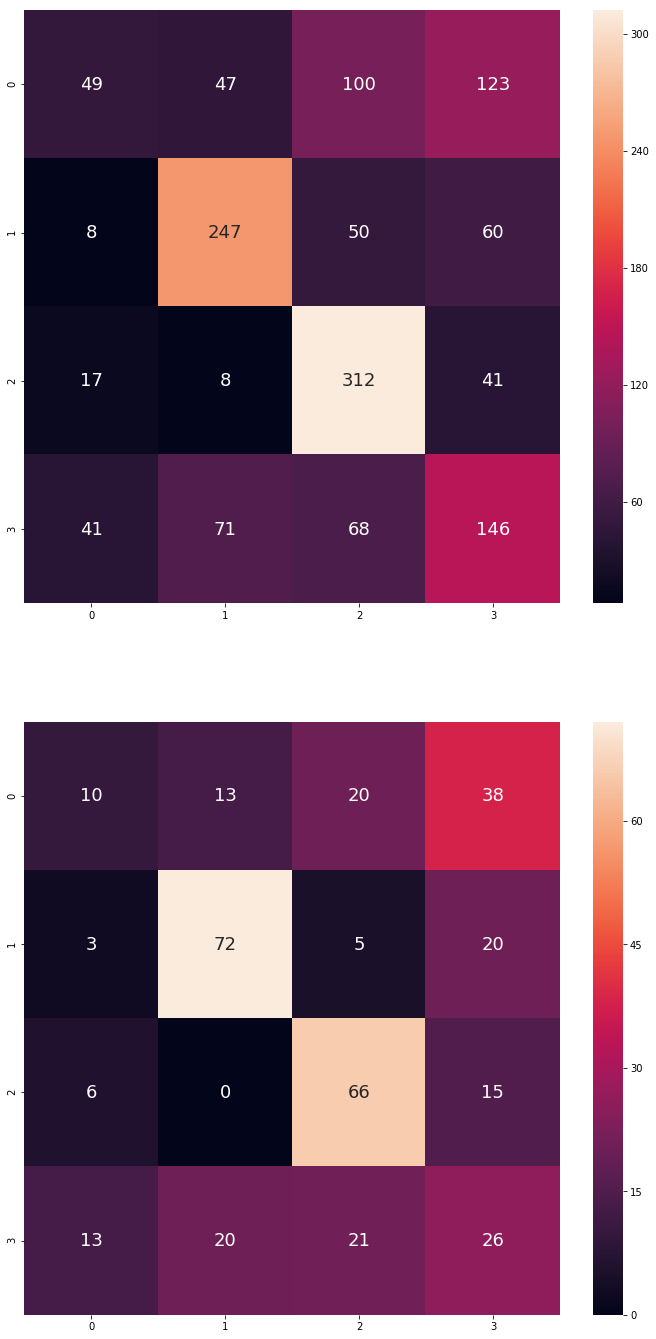

In [54]:
########Check for Male
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree_male.score(male_train, y_male_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree_male.score(male_test, y_male_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_male_train, male_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_male_test, male_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5003958828186856

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.4208860759493671



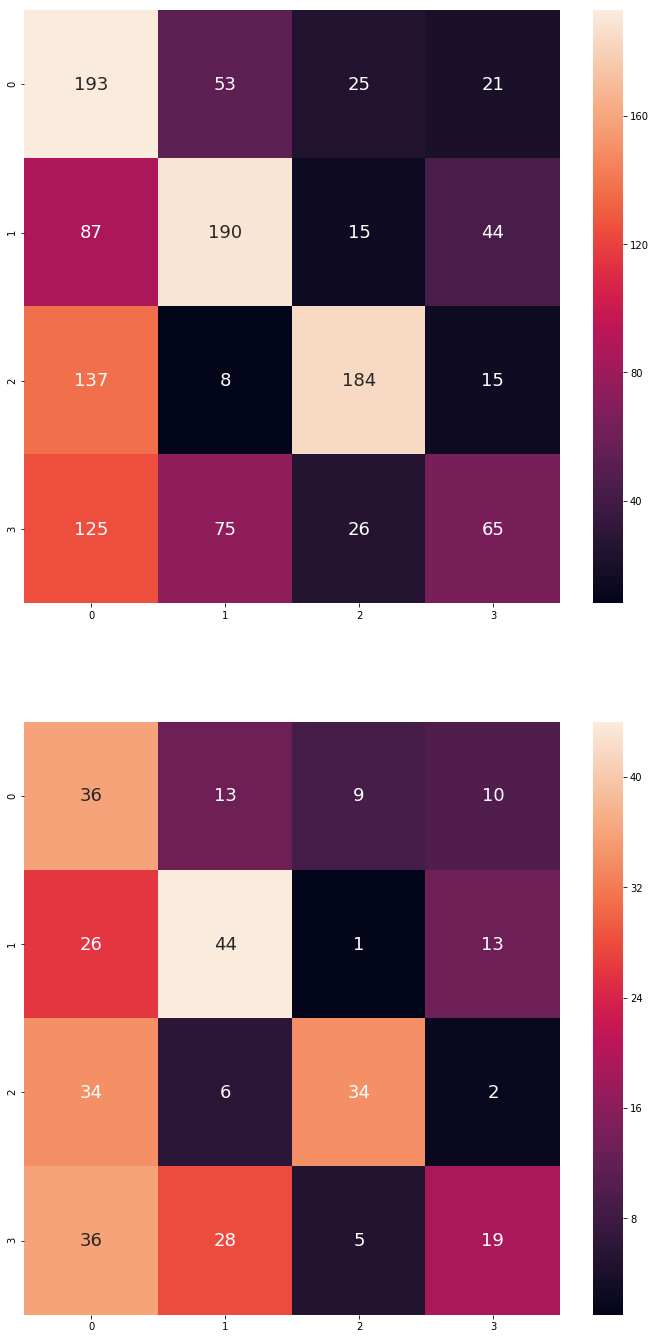

In [55]:
########Check for Female
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree_female.score(female_train, y_female_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree_female.score(female_test, y_female_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_female_train, female_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_female_test, female_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

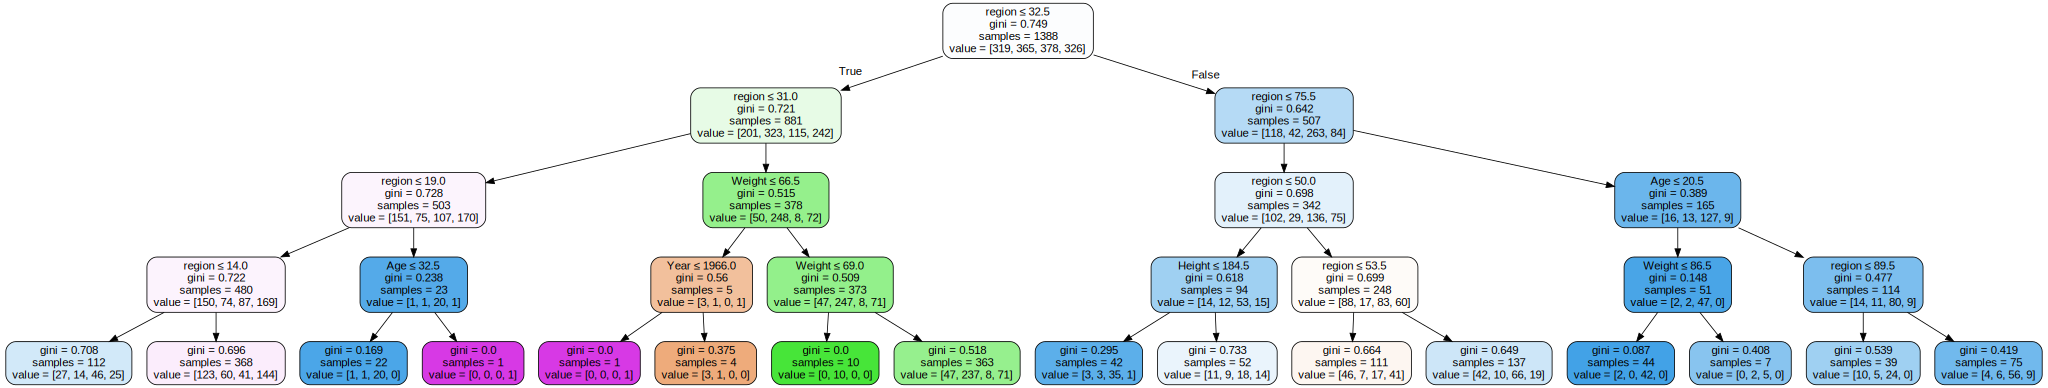

In [56]:
# Plot the Decision Tree
#### MALE ######
treedot = export_graphviz(dectree_male,                                      # the model
                          feature_names = male_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

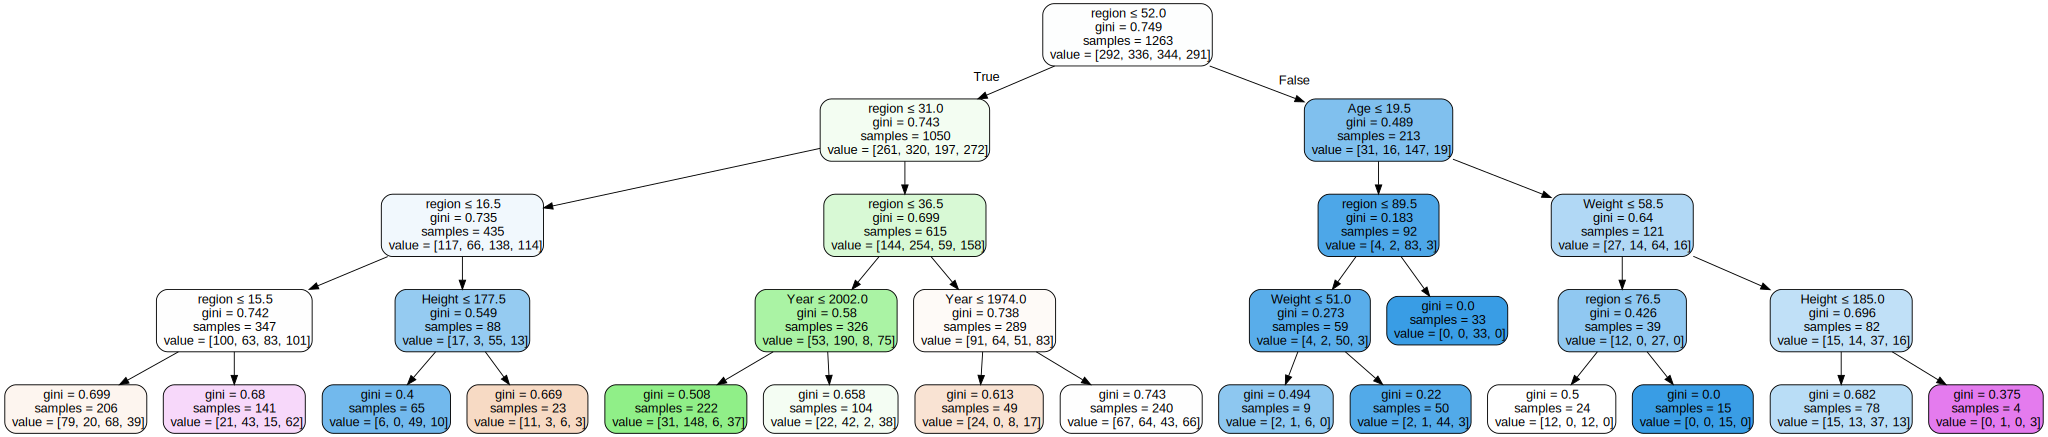

In [57]:
# Plot the Decision Tree
#### FEMALE ######
treedot = export_graphviz(dectree_female,                                      # the model
                          feature_names = female_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

### 3 test cases (Later)

# Random forest 

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib

In [59]:
predictors = ['Year','Age','Height','Weight','region']
X_male= pd.DataFrame(male[predictors])
X_female = pd.DataFrame(female[predictors])
medal_male = pd.DataFrame(male['Medal'].astype('category'))
medal_female = pd.DataFrame(female['Medal'].astype('category'))

Text(0.5, 1.0, 'Female')

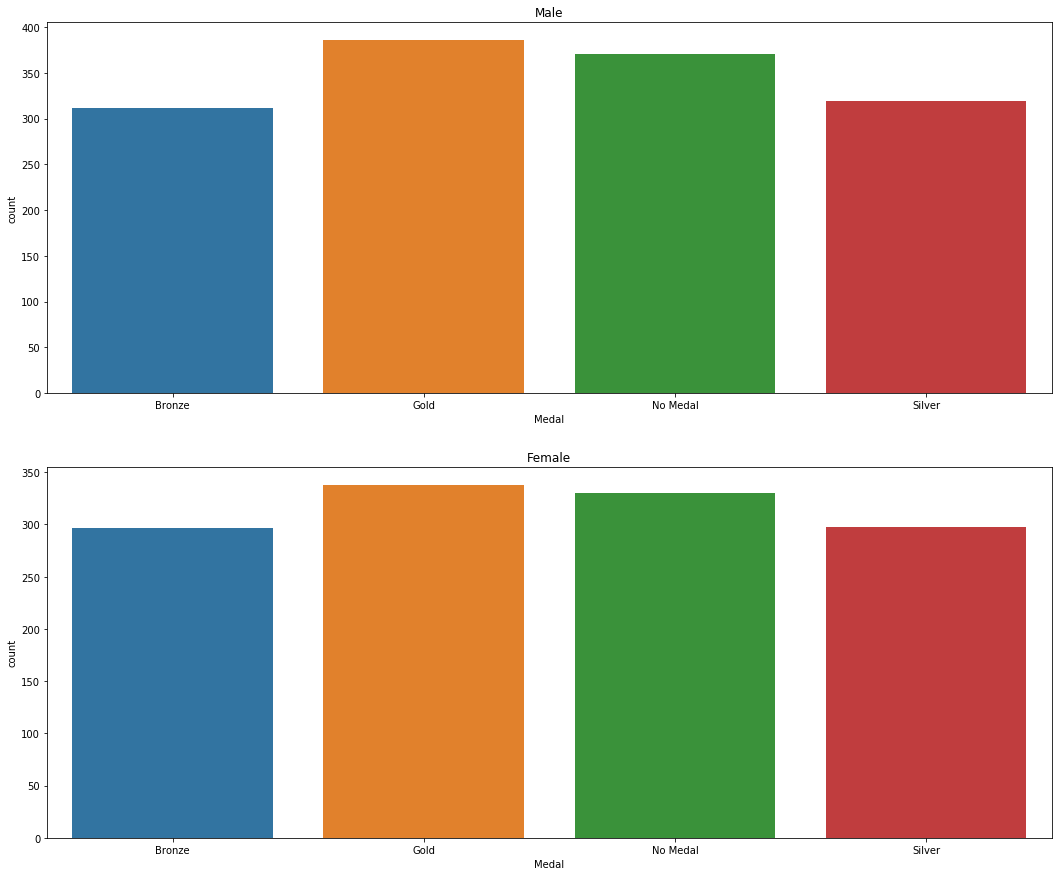

In [60]:
# Split the Dataset into Train and Test
male_train, male_test, y_male_train, y_male_test = train_test_split(X_male, medal_male, test_size = 0.2)
female_train, female_test, y_female_train, y_female_test = train_test_split(X_female, medal_female, test_size = 0.2)

# Draw the distribution of Response
f, axes = plt.subplots(2, 1, figsize=(18, 15))
sb.countplot(y_male_train["Medal"],ax = axes[0]).set_title('Male')
sb.countplot(y_female_train["Medal"],ax = axes[1]).set_title('Female')

In [61]:
## Train model
forest_male = RandomForestClassifier(n_estimators = 100,criterion='gini')
forest_male.fit(male_train,y_male_train.values.ravel())

forest_female = RandomForestClassifier(n_estimators=100,criterion='gini')
forest_female.fit(female_train,y_female_train.values.ravel())

##Predict
male_train_pred = forest_male.predict(male_train)
male_test_pred = forest_male.predict(male_test)

female_train_pred = forest_female.predict(female_train)
female_test_pred = forest_female.predict(female_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8717579250720461

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.47988505747126436



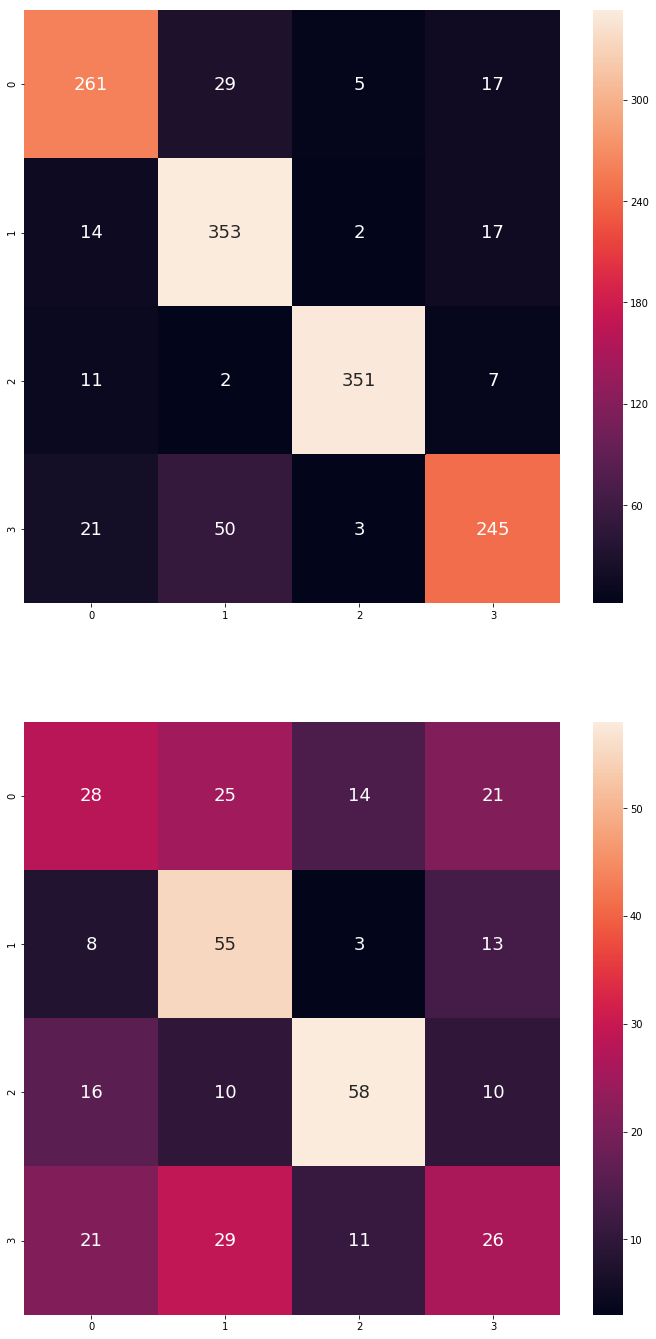

In [62]:
########Check for Male
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", forest_male.score(male_train, y_male_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", forest_male.score(male_test, y_male_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_male_train, male_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_male_test, male_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8606492478226445

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5158227848101266



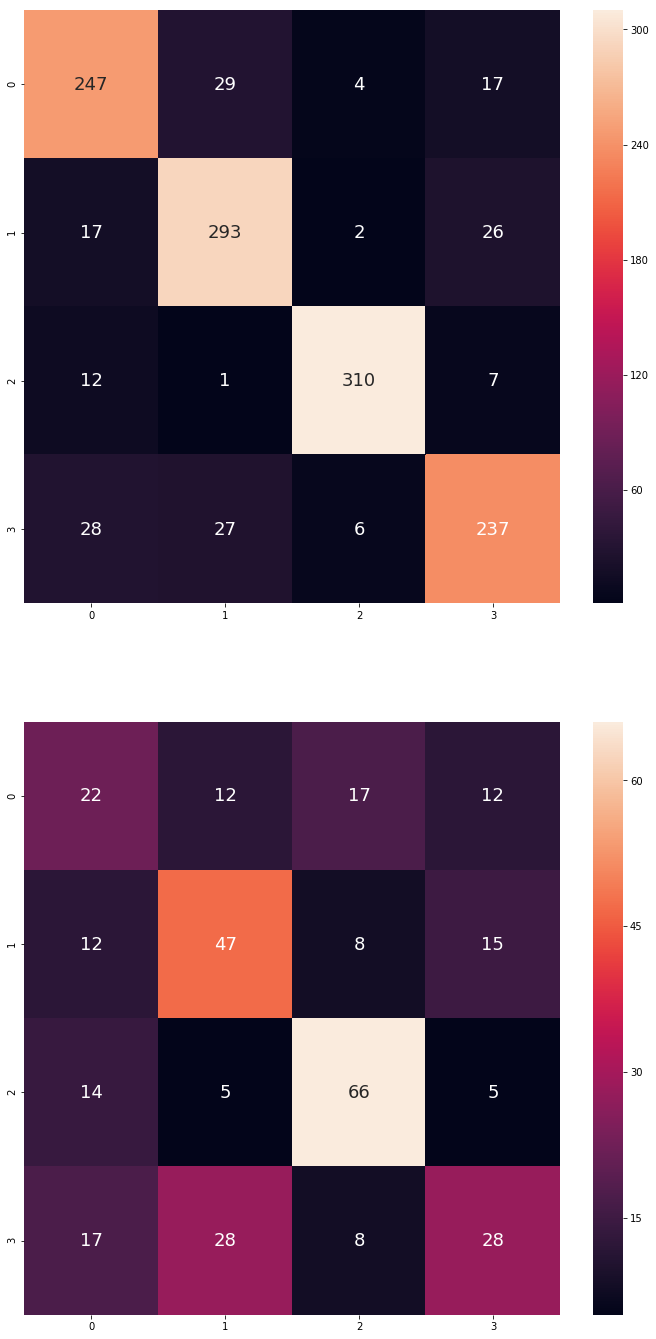

In [63]:
########Check for Female
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", forest_female.score(female_train, y_female_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", forest_female.score(female_test, y_female_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_female_train, female_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_female_test, female_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [65]:
predictors = ['Year','Age','Height','Weight','region']
X_male= pd.DataFrame(male[predictors])
X_female = pd.DataFrame(female[predictors])
medal_male = pd.DataFrame(male['Medal'].astype('category'))
medal_female = pd.DataFrame(female['Medal'].astype('category'))

In [66]:
# Split the Dataset into Train and Test
male_train, male_test, y_male_train, y_male_test = train_test_split(X_male, medal_male, test_size = 0.2)
female_train, female_test, y_female_train, y_female_test = train_test_split(X_female, medal_female, test_size = 0.2)


In [67]:
## Train model
logreg_male = LogisticRegression(C=1e5,solver='lbfgs', multi_class='multinomial',max_iter = 1000)
logreg_male.fit(male_train,y_male_train.values.ravel())

logreg_female = LogisticRegression(C=1e5,solver='lbfgs', multi_class='multinomial',max_iter=1000)
logreg_female.fit(female_train,y_female_train.values.ravel())

##Predict
male_train_pred = logreg_male.predict(male_train)
male_test_pred = logreg_male.predict(male_test)

female_train_pred = logreg_female.predict(female_train)
female_test_pred = logreg_female.predict(female_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.3984149855907781

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.40229885057471265



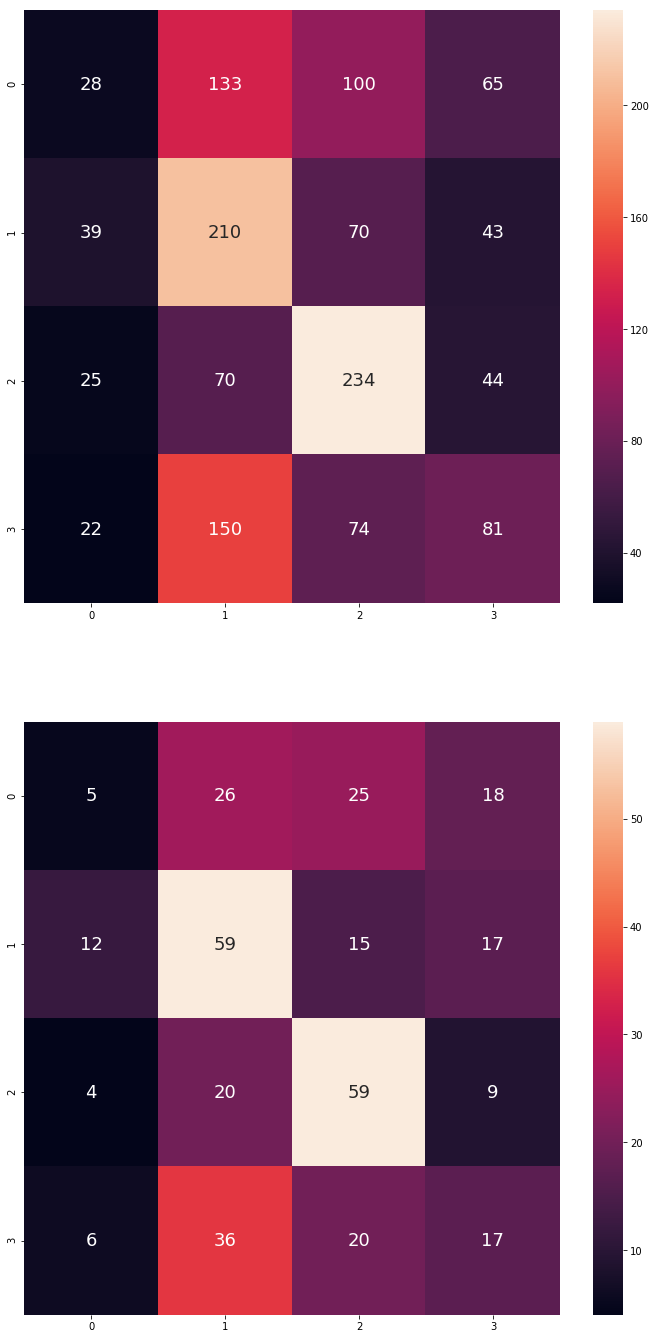

In [68]:
########Check for Male
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", logreg_male.score(male_train, y_male_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", logreg_male.score(male_test, y_male_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_male_train, male_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_male_test, male_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### 3 Test Case